<a href="https://colab.research.google.com/github/Josephmdlv/Final-work/blob/main/Did_Democracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install linearmodels
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import os
from google.colab import files
import requests

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
from google.colab import files
uploaded = files.upload ()

Saving Did_Democracy.csv to Did_Democracy.csv


In [3]:
df_s = pd.read_csv('Did_Democracy.csv')
df_s

,date_year,democracy_score,country_name
0,2005,2.811165,Oman
1,2006,2.770000,Oman
2,2007,2.915191,Oman
3,2008,2.980000,Oman
4,2009,2.998475,Oman
5,2010,2.860000,Oman
6,2011,3.260000,Oman
7,2012,3.260000,Oman
8,2013,3.260000,Oman
9,2014,3.150000,Oman


In [4]:
df_s['date_year'] = pd.to_datetime(df_s['date_year'], format='%Y')
df_s.rename(columns={'democracy_score': 'democracy_index'}, inplace=True)
df_s

,date_year,democracy_index,country_name
0,2005-01-01,2.811165,Oman
1,2006-01-01,2.770000,Oman
2,2007-01-01,2.915191,Oman
3,2008-01-01,2.980000,Oman
4,2009-01-01,2.998475,Oman
5,2010-01-01,2.860000,Oman
6,2011-01-01,3.260000,Oman
7,2012-01-01,3.260000,Oman
8,2013-01-01,3.260000,Oman
9,2014-01-01,3.150000,Oman


In [5]:
did=df_s


# Create the chart
fig = px.line(
    df_s,
    x='date_year',
    y='democracy_index',
    color='country_name',
    title="Democracy index in Tunisia and Oman"
)

# Show the chart
fig.show()

In [6]:
did['post']=np.where(did['date_year']>='2010-01-01',1,0) # create a variable that is 1 if the date is after the minimum wage increase and 0 otherwise
did['treatment']=np.where(did['country_name']=='Tunisia',1,0) # create a variable that is 1 if the state is new jersey (i.e., the treatment group) and 0 for pennsylvania (the control group)
did['post_treatment']=did['post']*did['treatment'] # create a variable that is 1 if the date is after the minimum wage increase and the state is new jersey and 0 otherwise

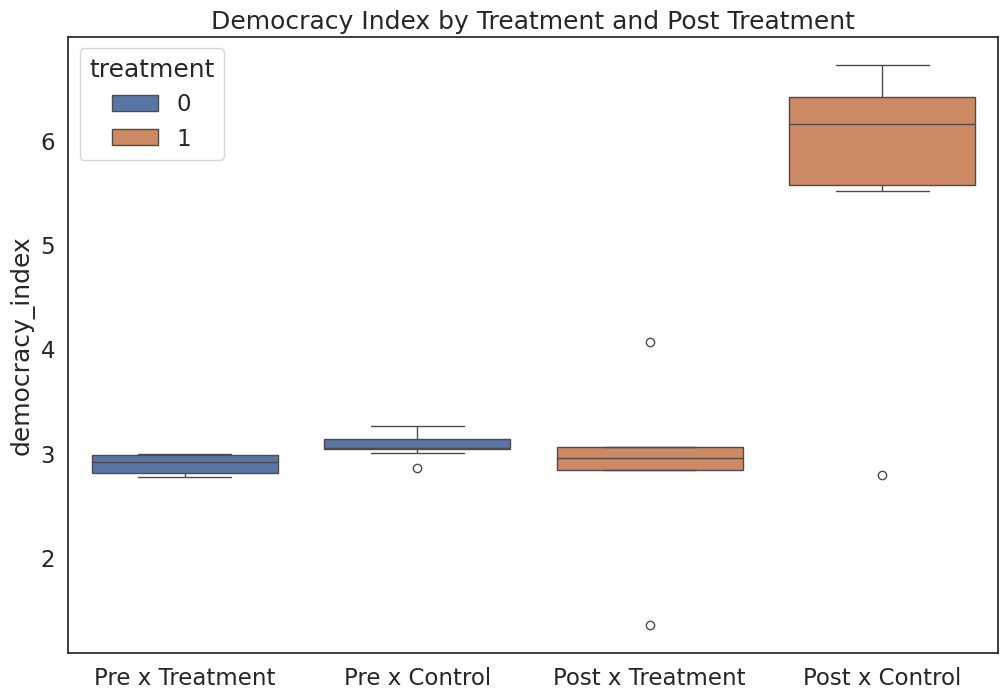

In [7]:
did['category']=did['treatment'].astype(str)+did['post'].astype(str) # this variable is just for the plot below
sns.boxplot(x='category', y='democracy_index', hue='treatment', data=did).set_xticklabels(["Pre x Treatment", "Pre x Control",'Post x Treatment','Post x Control'])
plt.xlabel('')
plt.title('Democracy Index by Treatment and Post Treatment')
plt.show()

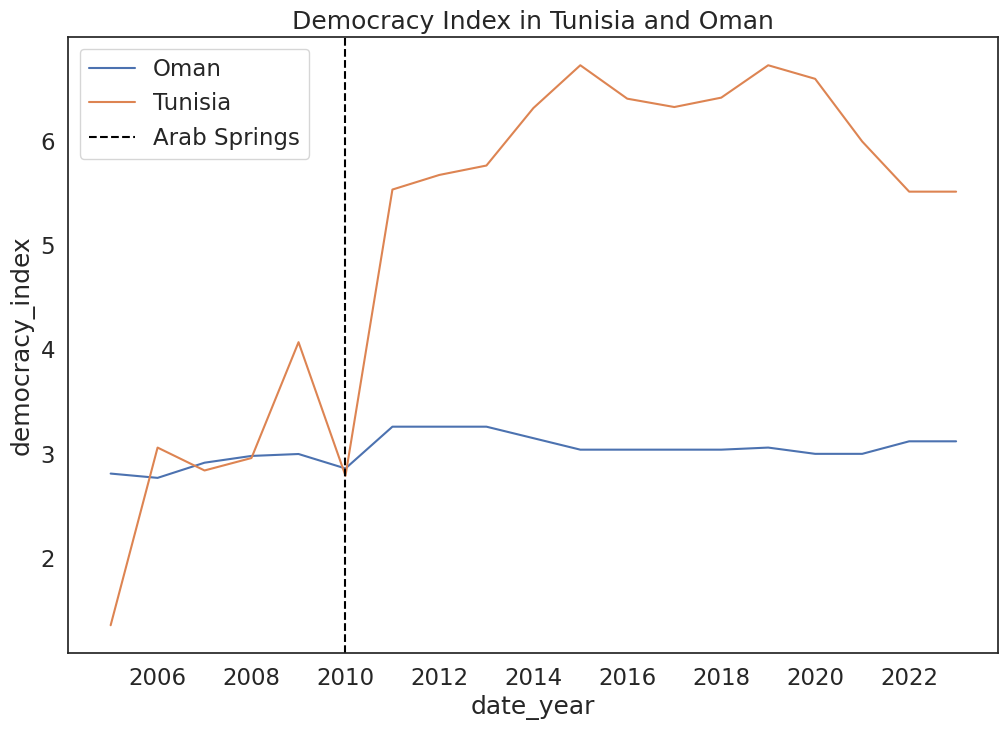

In [8]:
did=did[(did['date_year']>='2005-01-01') & (did['date_year']<='2023-01-01')]
sns.lineplot(data=did,x='date_year',y='democracy_index',hue='country_name')
plt.axvline(pd.to_datetime('2010-01-01'),color='black',linestyle='dashed', label='Arab Springs')
plt.title('Democracy Index in Tunisia and Oman')
plt.legend()

In [9]:
did_model = ols('democracy_index ~  post + treatment + post_treatment', did).fit()
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:        democracy_index   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     49.31
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.79e-12
Time:                        15:44:09   Log-Likelihood:                -38.454
No. Observations:                  38   AIC:                             84.91
Df Residuals:                      34   BIC:                             91.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8950      0.315      9.